# **Linear Regression Using TensorFlow**

This notebook demonstrates the application of TensorFlow for Linear Regression tasks. The dataset utilized in this project represents the number of transistors in an integrated circuit over the years. This dataset is known as Moore's Law, named after Gordon Moore, as it shows the exponential growth with the number of transistors doubling every year. I intentionally selected this dataset to highlight the importance of data normalization and showcase advanced data manipulation skills, as it is not ideally suited for a linear regression task.



In [1]:
import tensorflow as tf

In [2]:
# Other imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Get the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Load in the data
data = pd.read_csv("/content/drive/MyDrive/ml-data/moore-data.csv").to_numpy()

In [5]:
data

array([[       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,      385000],
       [       1987,

In [6]:
X = data[:,0].reshape(-1,1) # making an N x D matrix
Y = data[:,1]

The purpose of this code is to transform the one-dimensional array obtained from data[:,0] into a two-dimensional matrix with a single column.This transformation is often needed in machine learning tasks, where the input data is expected to be in the form of a matrix. The -1 argument in the reshape function is a placeholder that indicates that the dimension should be automatically determined based on the size of the array. In this case, it is used to reshape the 1-dimensional column into a column vector with multiple rows. So, the resulting X will be an N x 1 matrix, where N represents the number of elements in the selected column.


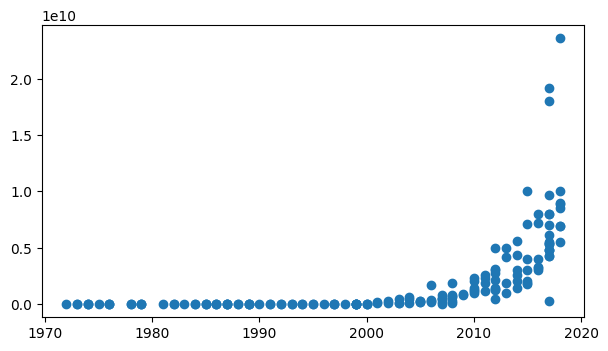

In [7]:
# Plot the data 
plt.figure(figsize=(7,3.8))
plt.scatter(X, Y);

This is a clear example of exponential growth. The high values are so high that they make initial values to look like 0. Since we'll be using a linear model, we'll be taking log of it, so we'll get a linear line. Log standardization is a data preprocessing technique that involves taking the natural logarithm of the data values, which can help normalize skewed distributions.

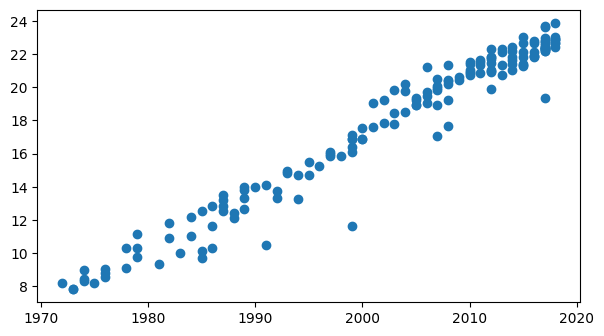

In [8]:
Y = np.log(Y)
plt.figure(figsize=(7,3.8))
plt.scatter(X,Y);

You see that we have a range from 1970 to 2020. In machine learning, having this type of value range is generally not good. We'd like to shift the data by its mean and divide it by the standard deviation to standardize it.

In [9]:
# We'll only shift by mean in this example
X = X - X.mean()

In [10]:
X[:5]

array([[-30.39130435],
       [-29.39130435],
       [-29.39130435],
       [-28.39130435],
       [-28.39130435]])

In [11]:
# the shape is specified as (1,), indicating that the input data has one feature.
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

The compilation step is crucial because it sets the necessary configurations for training the model. It allows you to define the optimizer, specify the loss function, and optionally include additional metrics to monitor during training. By compiling the model, you prepare it to learn from the provided data and optimize its parameters to minimize the chosen loss function.

In [12]:
model.compile(                          # Input learning rate of the function below (lr)
    optimizer=tf.keras.optimizers.SGD(0.001,0.9), # we did not use adam, bc we didn't scale the data
    loss="mse",
)

In [13]:
# We'll create our own learning rate schedule function
def schedule(epoch, lr):
    if epoch > 50:
        return 0.0001
    return 0.001
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [14]:
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 4ms/step - loss: 347.1239 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 940.0609 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 399.7300 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 258.1080 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 170.3136 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 4ms/step - loss: 197.1952 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 97.7479 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 3ms/step - loss: 61.5768 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 45.3680 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 7ms/step - loss: 110.9079 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 4ms/step - loss: 

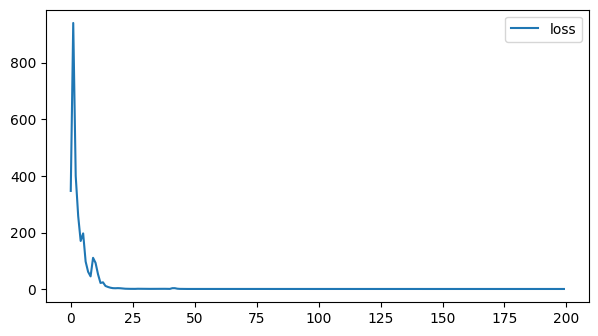

In [15]:
# Plot the loss
plt.figure(figsize=(7,3.8))
plt.plot(r.history["loss"], label="loss")
plt.legend();

In [16]:
model.layers

In deep learning, a model typically consists of multiple layers, and each layer contains weights and biases that are learned during the training process. The weights represent the learned parameters that the model uses to make predictions.

In [17]:
model.layers[0].get_weights()

[array([[0.3450859]], dtype=float32), array([17.829039], dtype=float32)]

In this case, [0] is used to access the weight matrix of the first layer, and [0, 0] is used to extract the value at the first row and first column of that weight matrix.

 The weight values can provide insights into the learned representations and relationships captured by the model. Analyzing these weights can help in understanding how the model is making predictions and identifying any patterns or features that are relevant to the task at hand.

In [18]:
a = model.layers[0].get_weights()[0][0,0]

In [19]:
a

0.3450859

In [20]:
# Find the time to double for the exponential growth 
print("Time to double:", np.log(2) / a)

Time to double: 2.008622208128068


In [21]:
# We can find slope and intercept 
# Flatten input array X to a 1-dimensional array bc X is must be a vector rather than a multi-dimensional array
X = X.flatten()
denominator = X.dot(X) - X.mean() * X.sum()
# The formula for the slope "a"
a = ( X.dot(Y) - Y.mean() * X.sum()) / denominator
# And the formula for the intercept "b"
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator
print(a,b)

0.3423656760882374 17.82720197122005


In [22]:
print("Time to double:", np.log(2) / a)

Time to double: 2.024581402200206


#**Making Predictions with Model**

6/6 [==============================] - 0s 2ms/step


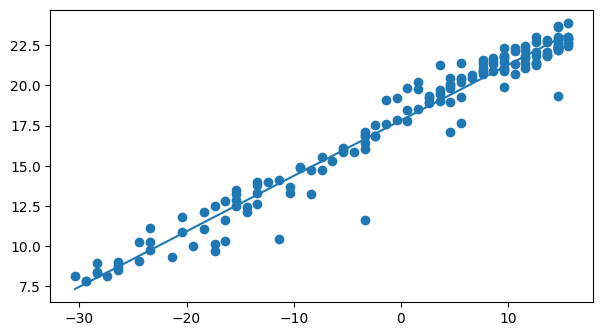

In [23]:
# Make sure that line fits our data
Yhat = model.predict(X).flatten()
plt.figure(figsize=(7,3.8))
plt.scatter(X,Y)
plt.plot(X,Yhat);

By plotting the original data points and the predicted values on the same graph, we can visually assess how well the linear regression model fits the data.

In [24]:
# Manual calculation 

# Get the weights
w, b = model.layers[0].get_weights()

# Reshape X because we flattened it earlier
X = X.reshape(-1, 1)

# (N X 1) X (1 X 1) + (1) --> (N X 1)
Yhat2 = (X.dot(w) + b).flatten()

# Don't use == for floating points
np.allclose(Yhat, Yhat2) # For floating points

True

We can manually calculate the predicted values based on the weights and biases obtained from the trained linear regression model. Then we can compare the manually calculated predictions *Yhat2* with the predictions obtained from the model *Yhat* using np.allclose() function.

# **Part 3: Saving and Loading a Model**

In [25]:
 # Save model to a file
 model.save('linearregressor.h5')
 

In [26]:
# Check the model file exists
!ls -lh

total 28K
drwx------ 5 root root 4.0K Jun  5 09:43 drive
-rw-r--r-- 1 root root  18K Jun  5 10:53 linearregressor.h5
drwxr-xr-x 1 root root 4.0K Jun  1 22:51 sample_data


In [27]:
# Load it and confirm that it still works
model = tf.keras.models.load_model("linearregressor.h5")
print(model.layers)